<a href="https://colab.research.google.com/github/khushiibansall/Employee-Attrition-Prediction/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

In [7]:
attrition = pd.read_csv('Employee-Attrition.csv')

<ipython-input-11-71aad738ed16>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-11-71aad738ed16>:14: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-11-71aad738ed16>:19: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-11-71aad738ed16>:24: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-11-71aad738ed16>:29: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-11-71aad738ed16>

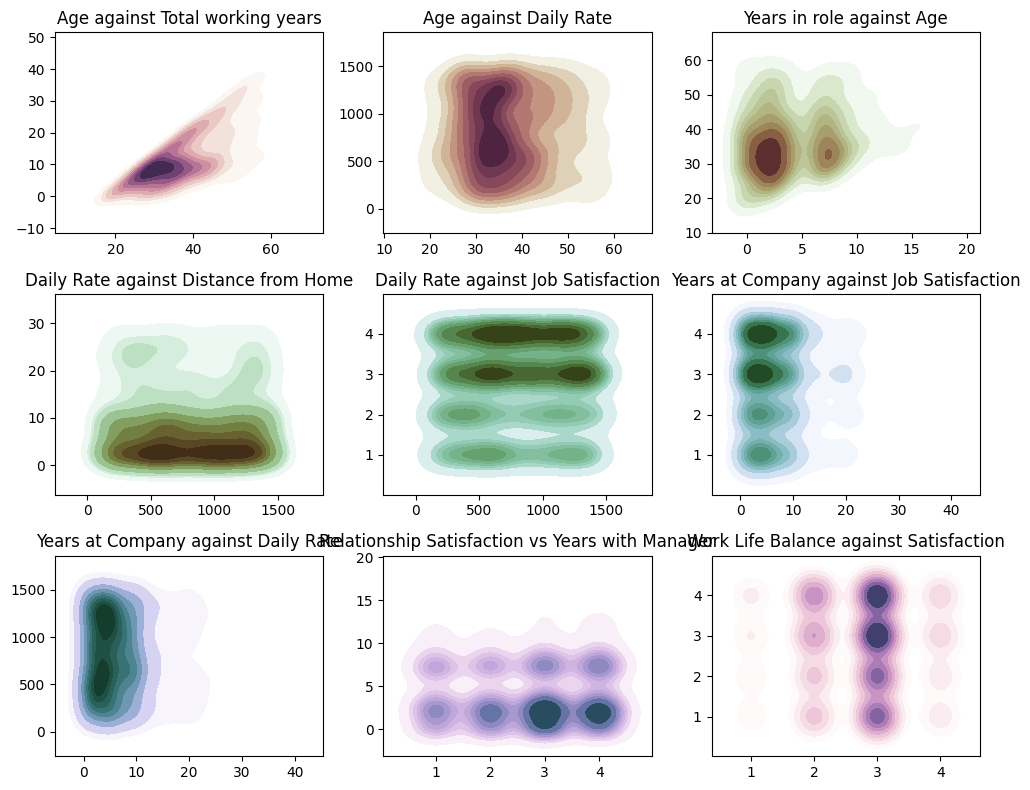

In [11]:
# Create subplots
f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)

# Plot 1
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(x=attrition['Age'].values, y=attrition['TotalWorkingYears'].values, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set(title='Age against Total working years')

# Plot 2
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)
sns.kdeplot(x=attrition['Age'].values, y=attrition['DailyRate'].values, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set(title='Age against Daily Rate')

# Plot 3
cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)
sns.kdeplot(x=attrition['YearsInCurrentRole'].values, y=attrition['Age'].values, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set(title='Years in role against Age')

# Plot 4
cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
sns.kdeplot(x=attrition['DailyRate'].values, y=attrition['DistanceFromHome'].values, cmap=cmap, shade=True, ax=axes[1,0])
axes[1,0].set(title='Daily Rate against Distance from Home')

# Plot 5
cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)
sns.kdeplot(x=attrition['DailyRate'].values, y=attrition['JobSatisfaction'].values, cmap=cmap, shade=True, ax=axes[1,1])
axes[1,1].set(title='Daily Rate against Job Satisfaction')

# Plot 6
cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)
sns.kdeplot(x=attrition['YearsAtCompany'].values, y=attrition['JobSatisfaction'].values, cmap=cmap, shade=True, ax=axes[1,2])
axes[1,2].set(title='Years at Company against Job Satisfaction')

# Plot 7
cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
sns.kdeplot(x=attrition['YearsAtCompany'].values, y=attrition['DailyRate'].values, cmap=cmap, shade=True, ax=axes[2,0])
axes[2,0].set(title='Years at Company against Daily Rate')

# Plot 8
cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)
sns.kdeplot(x=attrition['RelationshipSatisfaction'].values, y=attrition['YearsWithCurrManager'].values, cmap=cmap, shade=True, ax=axes[2,1])
axes[2,1].set(title='Relationship Satisfaction vs Years with Manager')

# Plot 9
cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)
sns.kdeplot(x=attrition['WorkLifeBalance'].values, y=attrition['JobSatisfaction'].values, cmap=cmap, shade=True, ax=axes[2,2])
axes[2,2].set(title='Work Life Balance against Satisfaction')

# Adjust layout
f.tight_layout()
plt.show()


In [13]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome',
             u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z= attrition[numerical].astype(float).corr().values, # Generating the Pearson correlation
        x=attrition[numerical].columns.values,
        y=attrition[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
#         text = True ,
        opacity = 1.0

    )
]


layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 700,

)


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

In [17]:
print(attrition.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [18]:
if 'Attrition_numerical' in attrition.columns:
    attrition = attrition.drop(['Attrition_numerical'], axis=1)


In [19]:
attrition = attrition.drop(['Attrition_numerical'], axis=1, errors='ignore')


In [20]:
print(attrition.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [22]:
# Drop the 'Attrition_numerical' column if it exists
attrition = attrition.drop(['Attrition_numerical'], axis=1, errors='ignore')

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.items():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list
numerical = attrition.columns.difference(categorical)


In [23]:
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)
attrition_num = attrition[numerical]
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [24]:
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])

In [26]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

# Split data into train and test sets
train, test, target_train, target_test = train_test_split(
    attrition_final,
    target,
    train_size=0.80,
    random_state=0
)

# If you need StratifiedShuffleSplit, here’s how to use it:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=0)
for train_index, test_index in split.split(attrition_final, target):
    train, test = attrition_final.iloc[train_index], attrition_final.iloc[test_index]
    target_train, target_test = target.iloc[train_index], target.iloc[test_index]


In [29]:
pip install imbalanced-learn

In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
train, test, target_train, target_test = train_test_split(
    attrition_final,
    target,
    train_size=0.80,
    random_state=0
)

train, val, target_train, target_val = train_test_split(
    train,
    target_train,
    train_size=0.80,
    random_state=0
)

# Initialize SMOTE
oversampler = SMOTE(random_state=0)

# Resample the training data
smote_train, smote_target = oversampler.fit_resample(train, target_train)

# Random Forest parameters
seed = 0
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
    'max_features': 'sqrt',
    'max_depth': 4,
    'min_samples_leaf': 2,
    'random_state': seed,
    'verbose': 0
}

# Initialize and fit Random Forest
rf = RandomForestClassifier(**rf_params)
rf.fit(smote_train, smote_target)

# Predict and evaluate
rf_predictions = rf.predict(test)
print("Accuracy score: {}".format(accuracy_score(target_test, rf_predictions)))
print("="*80)
print(classification_report(target_test, rf_predictions))


Accuracy score: 0.8435374149659864
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       245
           1       0.54      0.41      0.47        49

    accuracy                           0.84       294
   macro avg       0.71      0.67      0.69       294
weighted avg       0.83      0.84      0.83       294



In [33]:
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')